<a href="https://colab.research.google.com/github/Oak-ke/Correlation-Project-/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## README

# Movie Data Analysis

This repository contains a Jupyter Notebook that performs an exploratory data analysis on a movie dataset. The goal is to understand the factors that influence a movie's gross earnings, with a particular focus on the relationship between budget and gross.

## Dataset

The analysis is based on a dataset containing information about various movies, including their name, rating, genre, year, release date, score, votes, director, writer, star, country, budget, gross earnings, company, and runtime.

## Analysis Steps

1.  **Data Loading and Inspection**: The dataset is loaded into a pandas DataFrame, and initial inspections are performed to understand the data structure and content.
2.  **Missing Data Handling**: Missing values in numeric columns are identified and imputed with the mean value of the respective column.
3.  **Data Type Conversion**: The 'budget' and 'gross' columns are converted to integer data types for appropriate numerical analysis.
4.  **Data Sorting**: The DataFrame is sorted by gross earnings in descending order to highlight the highest-grossing movies.
5.  **Visual Exploration**: Scatter plots and regression plots are used to visualize the relationship between movie budget and gross earnings.
6.  **Correlation Analysis**:
    *   A correlation matrix is calculated for all numeric columns to understand the pairwise linear relationships between them.
    *   The correlation matrix is visualized using a heatmap for better interpretation.
    *   Categorical columns are converted to a numerical representation to include them in the correlation analysis.
    *   The correlation matrix is then analyzed to identify highly correlated pairs of features.

## Key Findings (Based on the notebook's current output)

*   There appears to be a high correlation between a movie's `budget` and its `gross` earnings.
*   There is also a notable correlation between the number of `votes` a movie receives and its `gross` earnings.

## How to Run the Notebook

1.  Clone this repository.
2.  Install the required libraries (pandas, numpy, seaborn, matplotlib).
3.  Open the `movie_data_analysis.ipynb` notebook in a Jupyter environment (like Google Colab, Jupyter Notebook, or JupyterLab).
4.  Run the cells sequentially to replicate the analysis. You will need to upload the `movies.csv` file when prompted.

## Future Work

*   Further investigate the impact of other features (genre, director, star, company) on gross earnings.
*   Perform more advanced data cleaning and feature engineering.
*   Build a predictive model to estimate movie gross earnings based on other features.

In [ ]:
# import liblaries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
# importing my file (movies) to colab

from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (1).csv


In [ ]:
# Reading my file
df = pd.read_csv(io.BytesIO(uploaded['movies (1).csv']))

In [ ]:
# Looking at our data using the head method
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [ ]:
# Checking for Missing Data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
# Adding the mean value to all missing columns

numeric_cols = df.select_dtypes(include=np.number).columns

# Step 2b: Calculate the mean for each numeric column and fill NaNs
for col in numeric_cols:
    # Check if the column has any missing values
    if df[col].isnull().any():
        # Calculate the mean of the non-missing values
        col_mean = df[col].mean()

        # Fill the missing values (NaNs) in that column with the calculated mean
        df[col].fillna(col_mean, inplace=True)

/tmp/ipython-input-2184187505.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(col_mean, inplace=True)


In [ ]:
# Cheking the data types in our columns

df.dtypes




name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#Change data-type of Budget and Gross

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [ ]:
#Cheking our data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Drop any Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4637                                       Yash Raj Films
4990                            Yari Film Group Releasing
5410                                Yari Film Group (YFG)
7576                                     Yale Productions
4347                                X-Filme Creative Pool
6798    Wytwórnia Filmów Dokumentalnych i Fabularnych ...
6919                              Worldview Entertainment
4392                          World of Wonder Productions
4999                  World Wrestling Entertainment (WWE)
425                                   World Film Services
6674                                  Working Title Films
3749                                          Working Dog
3637                                 Woodline Productions
2173                            Wong Jing's Workshop Ltd.
4272                                         Wiseau-Films
450                                   Winwood Productions
3624                                Winslow Partners Ltd.
3943                                        Winkler Films
2466                                        WingNut Films
818                                Window III Productions
2355                                 Wildwood Enterprises
6720                                       Wildgaze Films
5276                                           Wild Bunch
7032                                         Wigwam Films
4863                      Wiedemann & Berg Filmproduktion
2194                                  Why Not Productions
4572                                     Whitewater Films
6616                               WhiteFlame Productions
1306                                           White Lair
1475                                          White Eagle
5715                                         Whenua Films
1421                                             Westwind
7017                                       Westerly Films
1304                        Weintraub Entertainment Group
7225                                         Ways & Means
5496                                Wayfare Entertainment
6672                                        Waverly Films
5395                                               Warp X
4886                                           Warp Films
4781                    Warner Independent Pictures (WIP)
7267                                Warner Bros. Pictures
2843                    Warner Bros. Family Entertainment
6578                    Warner Bros. Digital Distribution
2341                               Warner Bros. Animation
5845                                         Warner Bros.
7401                               Warner Animation Group
222                               Walt Disney Productions
7480                                 Walt Disney Picture

In [ ]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

Starting the Correlation Check

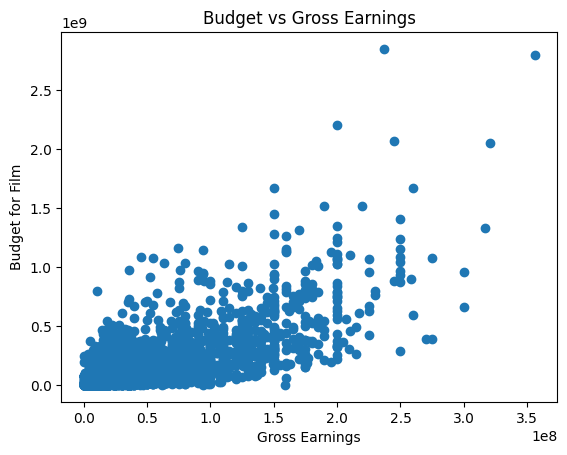

In [ ]:
# Scatter plot with Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [ ]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

<Axes: xlabel='budget', ylabel='gross'>

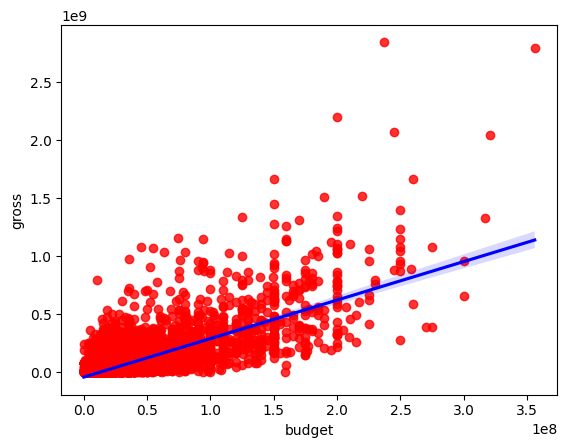

In [ ]:
#Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})


In [ ]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

In [ ]:
# lets start looking at correlation
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222810  0.265578  0.252042  0.120766
score    0.097936  1.000000  0.409182  0.064541  0.182868  0.399329
votes    0.222810  0.409182  1.000000  0.421007  0.628713  0.309166
budget   0.265578  0.064541  0.421007  1.000000  0.711270  0.265287
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241335
runtime  0.120766  0.399329  0.309166  0.265287  0.241335  1.000000

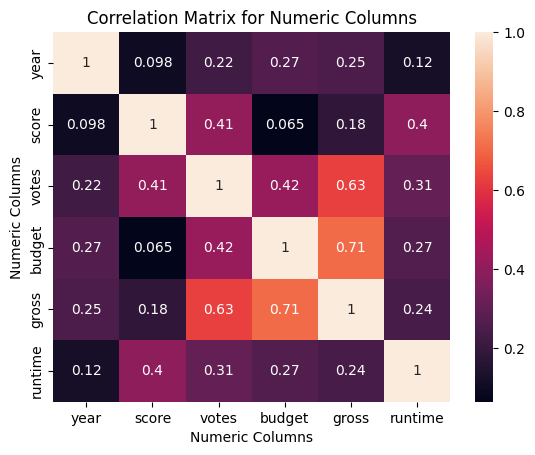

In [ ]:
# High Correlation between Budget and Gross

correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Numeric Columns')
plt.show()

In [ ]:
# Looking at company

df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name]= df_numerized[col_name].astype('category')

    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released     score         votes  director  \
5445   533       5      0  2009       696  7.800000  1.100000e+06      1155   
7445   535       5      0  2019       183  8.400000  9.030000e+05       162   
3045  6896       5      6  1997       704  7.800000  1.100000e+06      1155   
6663  5144       5      0  2015       698  7.800000  8.760000e+05      1125   
7244   536       5      0  2018       192  8.400000  8.970000e+05       162   
7480  6194       4      2  2019      1488  6.900000  2.220000e+05      1455   
6653  2969       5      0  2015      1704  7.000000  5.930000e+05       517   
6043  5502       5      0  2012      2472  8.000000  1.300000e+06      1517   
6646  2145       5      0  2015       221  7.100000  3.700000e+05      1189   
7494  2131       4      2  2019      2676  6.800000  1.480000e+05       432   
6644   534       5      0  2015      2235  7.300000  7.770000e+05      1517   
7247   791       5      0  2018       959  7.300000  6.610000e+05      2457   
5845  2407       5      1  2011      1445  8.100000  7.900000e+05       679   
7075  5145       5      0  2017       661  7.000000  5.810000e+05      2282   
7271  2970       5      0  2018      1799  6.200000  2.770000e+05      1121   
6262  2130       4      2  2013      2715  7.400000  5.850000e+05       432   
7072   657       4      7  2017      2022  7.100000  2.830000e+05       250   
7281  2760       4      2  2018      1729  7.600000  2.630000e+05       303   
7055  5833       5      0  2017        61  6.600000  2.140000e+05       835   
6244  2823       5      0  2013      2449  7.100000  7.790000e+05      2543   
6688  3622       4      2  2015      1395  6.400000  2.180000e+05      1639   
6846  1056       5      0  2016      2488  7.800000  6.940000e+05       162   
7250   474       5      0  2018       748  6.900000  4.040000e+05      1189   
4245  6221       5      0  2003       680  8.900000  1.700000e+06      2193   
7458  5084       5      0  2019      1501  7.500000  3.590000e+05      1463   
7456  1061       5      0  2019      2213  6.800000  4.780000e+05       147   
5878  6968       5      0  2011      1870  6.200000  3.900000e+05      1886   
6059  4951       5      0  2012      2804  7.700000  6.420000e+05      2476   
6494  6967       5      0  2014      1849  5.600000  3.020000e+05      1886   
2448  6194       1      2  1994      1811  8.500000  9.700000e+05      2415   
6047  5726       5      0  2012      1510  8.400000  1.600000e+06       483   
7463  5141       5      0  2019       731  6.500000  3.940000e+05      1125   
7450  2930       6      5  2019      3062  8.400000  1.000000e+06      2767   
7488  6949       1      2  2019      1787  7.700000  2.170000e+05      1509   
5685  6948       1      2  2010      1752  8.200000  7.760000e+05      1678   
4852  4258       5      0  2006      1645  7.300000  6.680000e+05       996   
6869  4616       5      0  2016       673  7.800000  5.720000e+05       912   
7481   290       4      1  2019      2394  6.900000  2.390000e+05      1031   
5860  4261       5      0  2011      2350  6.600000  4.920000e+05      2341   
7140  1552       4      2  2017      1896  6.300000  1.190000e+05      1639   
2245  2967       5      0  1993      1689  8.100000  8.940000e+05      2660   
6908  1978       4      2  2016      1744  7.300000  2.500000e+05       124   
3451  5138       4      0  1999      2318  6.500000  7.480000e+05       963   
5667   300       4      1  2010      2182  6.400000  3.920000e+05      2745   
6863  7504       4      2  2016      2175  8.000000  4.500000e+05       362   
6045  6001       5      1  2012       651  7.800000  7.730000e+05      2193   
3843  2412       4      1  2001      2593  7.600000  6.850000e+05       435   
5243  5725       5      0  2008      1476  9.000000  2.400000e+06       483   
5652  2406       5      1  2010      2620  7.700000  4.950000e+05       679   
6311  1551       4      2  2013      1599  7.300000  3.7

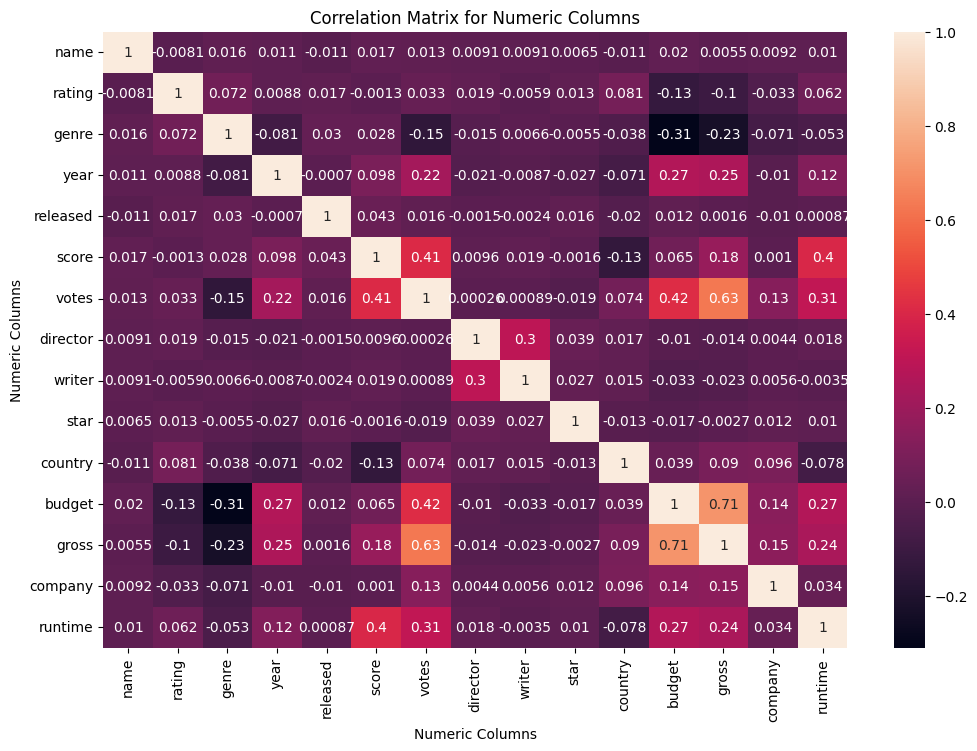

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
plt.figure(figsize=(12, 8)) # Adjust figure size
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Numeric Columns')
plt.show()

In [ ]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017095   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001310   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027959   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097936   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042779   
score     0.017095 -0.001310  0.027959  0.097936  0.042779  1.000000   
votes     0.013086  0.033127 -0.145276  0.222810  0.016094  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019410   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133343   
budget    0.020368 -0.126046 -0.310566  0.265578  0.012263  0.064541   
gross     0.005466 -0.102116 -0.230267  0.252042  0.001636  0.182868   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010390  0.062051 -0.052699  0.120766  0.000867  0.399329   

             votes  director    writer      star   country    budget  \
name      0.013086  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating    0.033127  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre    -0.145276 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year      0.222810 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released  0.016094 -0.001478 -0.002404  0.015777 -0.020427  0.012263   
score     0.409182  0.009559  0.019410 -0.001609 -0.133343  0.064541   
votes     1.000000  0.000260  0.000891 -0.019277  0.073622  0.421007   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer    0.000891  0.299067  1.000000  0.027245  0.015343 -0.033216   
star     -0.019277  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country   0.073622  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget    0.421007 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross     0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company   0.133129  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime   0.309166  0.017624 -0.003510  0.010171 -0.078297  0.265287   

             gross   company   runtime  
name      0.005466  0.009211  0.010390  
rating   -0.102116 -0.032943  0.062051  
genre    -0.230267 -0.071067 -0.052699  
year      0.252042 -0.010431  0.120766  
released  0.001636 -0.010474  0.000867  
score     0.182868  0.001030  0.399329  
votes     0.628713  0.133129  0.309166  
director -0.014272  0.004404  0.017624  
writer   -0.023210  0.005646 -0.003510  
star     -0.002682  0.012442  0.010171  
country   0.089949  0.095548 -0.078297  
budget    0.711270  0.144851  0.265287  
gross     1.000000  0.152694  0.241335  
company   0.152694  1.000000  0.034383  
runtime   0.241335  0.034383  1.000000

In [ ]:
correlation_matrix =df_numerized.corr(method='pearson')
corr_Pairs = correlation_matrix.unstack()
corr_Pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017095
          votes       0.013086
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.005466
          company     0.009211
          runtime     0.010390
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001310
          votes       0.033127
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102116
          company    -0.032943
          runtime     0.062051
genre     name        0.016355
          rating      0.072423
          genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027959
          votes      -0.145276
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          budget     -0.310566
          gross      -0.230267
          company    -0.071067
          runtime    -0.052699
year      name        0.011453
          rating      0.008779
          genre      -0.081261
          year        1.000000
          released   -0.000695
          score       0.097936
          votes       0.222810
          director   -0.020795
          writer     -0.008656
          star       -0.027242
          country    -0.070938
          budget      0.265578
          gross       0.252042
          company    -0.010431
          runtime     0.120766
released  name       -0.011311
          rating      0.016613
          genre       0.029822
          year       -0.000695
          released    1.000000
          score       0.042779
          votes       0.016094
          director   -0.001478
          writer     -0.002404
          star        0.015777
          country    -0.020427
          budget      0.012263
          gross       0.001636
          company    -0.010474
          runtime     0.000867
score     name        0.017095
          rating     -0.001310
          genre       0.027959
          year        0.097936
          released    0.042779
          score       1.000000
          votes       0.409182
          director    0.009559
          writer      0.019410
          star       -0.001609
          country    -0.133343
          budget      0.064541
          gross       0.182868
          company     0.001030
          runtime     0.399329
votes     name        0.013086
          rating      0.033127
          genre      -0.145276
          year        0.222810
          released    0.016094
          score       0.409182
          votes       1.000000
          director    0.000260
          writer      0.000891
          star       -0.019277
          country     0.073622
          budget      0.421007
          gross       0.628713
          company     0.133129
          runtime     0.309166
director  name        0.009079
          rating      0.019483
          genre      -0.015258
          year       -0.020795
          released   -0.001478
          score       0.009559
          votes       0.000260
          director    1.000000
          writer      0.299067
          star        0.039234
          country     0.017490
          budget     -0.010364
          gross      -0.014272
          company     0.004404
          runtime     0.017624
writer    name        0.009081
          rating     -0.005921
          genre       0.006567
          year       -0.008656
          released   -0.002404
          score       0.019410
          votes       0.000891
          director    0.299067
          writer      1.000000
 

In [ ]:
sorted_pairs = corr_Pairs.sort_values()
sorted_pairs

genre     budget     -0.310566
budget    genre      -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
          votes      -0.145276
votes     genre      -0.145276
score     country    -0.133343
country   score      -0.133343
budget    rating     -0.126046
rating    budget     -0.126046
          gross      -0.102116
gross     rating     -0.102116
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078297
runtime   country    -0.078297
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052699
genre     runtime    -0.052699
          country    -0.037615
country   genre      -0.037615
budget    writer     -0.033216
writer    budget     -0.033216
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
gross     writer     -0.023210
writer    gross      -0.023210
director  year       -0.020795
year      director   -0.020795
country   released   -0.020427
released  country    -0.020427
votes     star       -0.019277
star      votes      -0.019277
          budget     -0.016628
budget    star       -0.016628
genre     director   -0.015258
director  genre      -0.015258
gross     director   -0.014272
director  gross      -0.014272
star      country    -0.012998
country   star       -0.012998
released  name       -0.011311
name      released   -0.011311
          country    -0.010737
country   name       -0.010737
company   released   -0.010474
released  company    -0.010474
year      company    -0.010431
company   year       -0.010431
budget    director   -0.010364
director  budget     -0.010364
writer    year       -0.008656
year      writer     -0.008656
name      rating     -0.008069
rating    name       -0.008069
          writer     -0.005921
writer    rating     -0.005921
genre     star       -0.005477
star      genre      -0.005477
runtime   writer     -0.003510
writer    runtime    -0.003510
star      gross      -0.002682
gross     star       -0.002682
released  writer     -0.002404
writer    released   -0.002404
star      score      -0.001609
score     star       -0.001609
director  released   -0.001478
released  director   -0.001478
rating    score      -0.001310
score     rating     -0.001310
released  year       -0.000695
year      released   -0.000695
director  votes       0.000260
votes     director    0.000260
released  runtime     0.000867
runtime   released    0.000867
votes     writer      0.000891
writer    votes       0.000891
company   score       0.001030
score     company     0.001030
released  gross       0.001636
gross     released    0.001636
company   director    0.004404
director  company     0.004404
name      gross       0.005466
gross     name        0.005466
company   writer      0.005646
writer    company     0.005646
star      name        0.006472
name      star        0.006472
writer    genre       0.006567
genre     writer      0.006567
year      rating      0.008779
rating    year        0.008779
name      director    0.009079
director  name        0.009079
writer    name        0.009081
name      writer      0.009081
          company     0.009211
company   name        0.009211
score     director    0.009559
director  score       0.009559
runtime   star        0.010171
star      runtime     0.010171
runtime   name        0.010390
name      runtime     0.010390
          year        0.011453
year      name        0.011453
released  budget      0.012263
budget    released    0.012263
star      company     0.012442
company   star        0.012442
votes     name        0.013086
name      votes       0.013086
star      rating      0.013405
rating    star        0.013405
writer    country     0.015343
country   writer      0.015343
released  star        0.015777
star      released    0.015777
votes     released    0.016094
released  votes       0.016094
name      genre       0.016355
g

In [ ]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]
print(high_corr)

votes   gross     0.628713
gross   votes     0.628713
budget  gross     0.711270
gross   budget    0.711270
dtype: float64
